## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [33]:
# Use this cell to begin your analysis, and add as many as you would like!
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#Reading the data
office_episodes = pd.read_csv("datasets/office_episodes.csv")

#showing the data
office_episodes.head()
office_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [34]:
#Initializing the coloring scheme
color_scheme = []
for lab, row in office_episodes.iterrows():
    if row['scaled_ratings'] < 0.25:
        color_scheme.append("red")
    elif row['scaled_ratings'] < 0.5:
        color_scheme.append("orange")
    elif row['scaled_ratings'] < 0.75:
        color_scheme.append("lightgreen")
    else:
        color_scheme.append("darkgreen")
#print(color_scheme)

#Initializing the sizing system
sizing_system = []
for lab, row in office_episodes.iterrows():
    if row['has_guests'] == True:
        sizing_system.append(250)
    else:
        sizing_system.append(25)
#print(sizing_system)

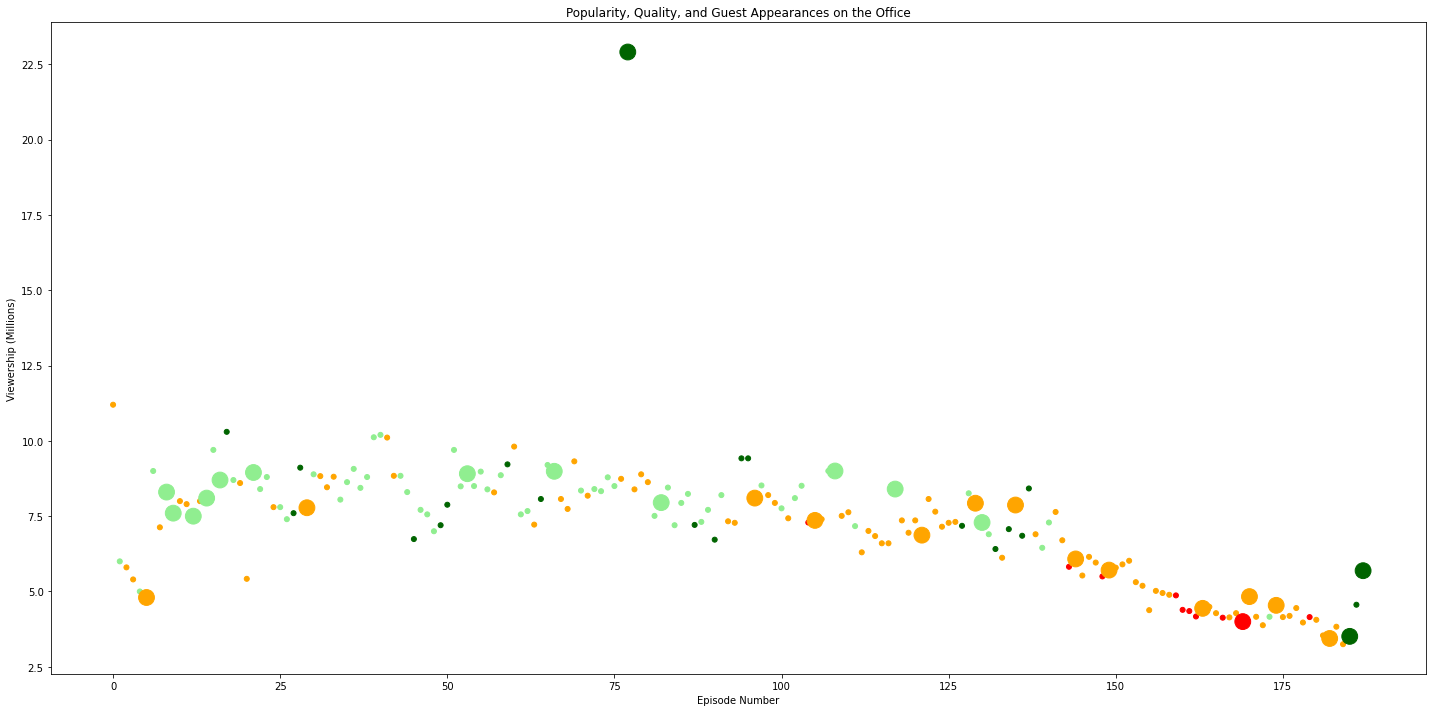

In [35]:
#plotting
#Initalize a matplotlib.pyplot fig object
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.scatter(office_episodes["episode_number"],office_episodes["viewership_mil"],c=color_scheme,s=sizing_system)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

In [36]:
#subset the DF to one record of the max "viewership_mil"
top_star_record = office_episodes[office_episodes["viewership_mil"] == office_episodes["viewership_mil"].max()]

#subset the col of "guest_stars"
top_star_df_values = top_star_record["guest_stars"]

#converting into list then string converting the accessing the value and splitting
top_star_list_values = str(top_star_df_values.values.tolist()[0]).split(",")

#accessing the first star in the vaues
top_star = top_star_list_values[0]
#print(top_star)
